## Machine Learning Project
Machine Learning project to classify loan applicants using German Credit dataset.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import numpy as np
import itertools
import seaborn as sb
import keras
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

%matplotlib inline


### Reading Dataset
Reading Dataset by using `pandas library`

In [42]:
credit_df = pd.read_csv( "german-credit-card.txt", delim_whitespace = True, header = None)

In [43]:
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Assigning the names of the columns, becuase in the dataset we don't have one.

In [44]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [45]:
credit_df.columns = columns

### One-Hot Encoding
We have many categorical features in the dataset, so for this reason we will One-hot encode the categorical features by call `pandas library` function `get_dummies`

In [46]:
credit_df = pd.get_dummies(credit_df, drop_first = True)
credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A12,checkin_acc_A13,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,0,0,1,1,0,1,0,0,0,0
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,1,1,0,0,0,1,1,0
997,12,804,4,4,38,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
998,45,1845,4,4,23,1,1,2,0,0,...,1,0,1,0,1,0,1,0,1,0


In [47]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   dependents             1000 non-null   int64
 7   status                 1000 non-null   int64
 8   checkin_acc_A12        1000 non-null   uint8
 9   checkin_acc_A13        1000 non-null   uint8
 10  checkin_acc_A14        1000 non-null   uint8
 11  credit_history_A31     1000 non-null   uint8
 12  credit_history_A32     1000 non-null   uint8
 13  credit_history_A33     1000 non-null   uint8
 14  credit_history_A34     1000 non-null   uint8
 15  purpose_A41            1000 non-null   

### Finding Outliers
Now in the section below we will find the outliers by using `seaborn` library, we are using `boxplot` function to find ot and visualize the outliers.

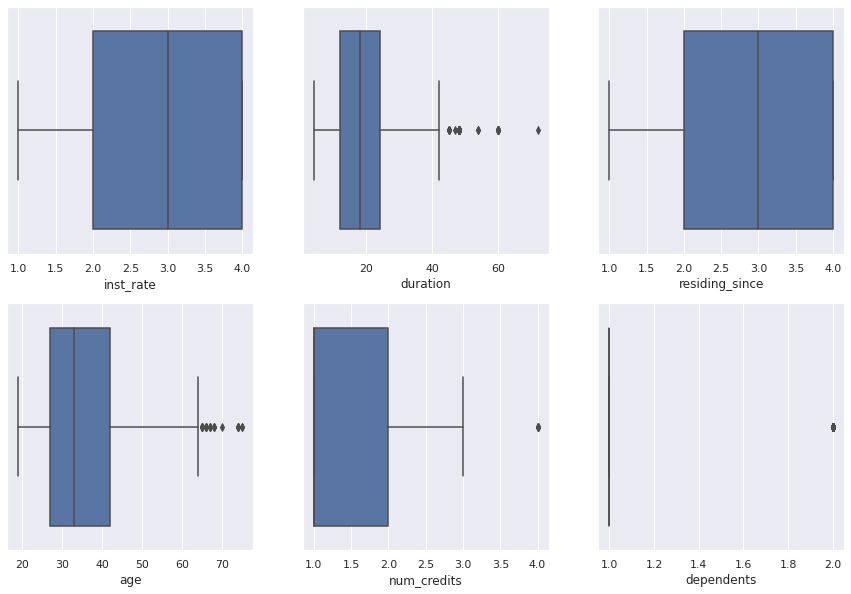

In [48]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In the section below we will remove the outliers.

In [49]:
credit_df = credit_df[credit_df.duration <= 43]
credit_df = credit_df[credit_df.age <= 55]
credit_df = credit_df[credit_df.dependents <= 1]
# X = X[X.duration <= 43]

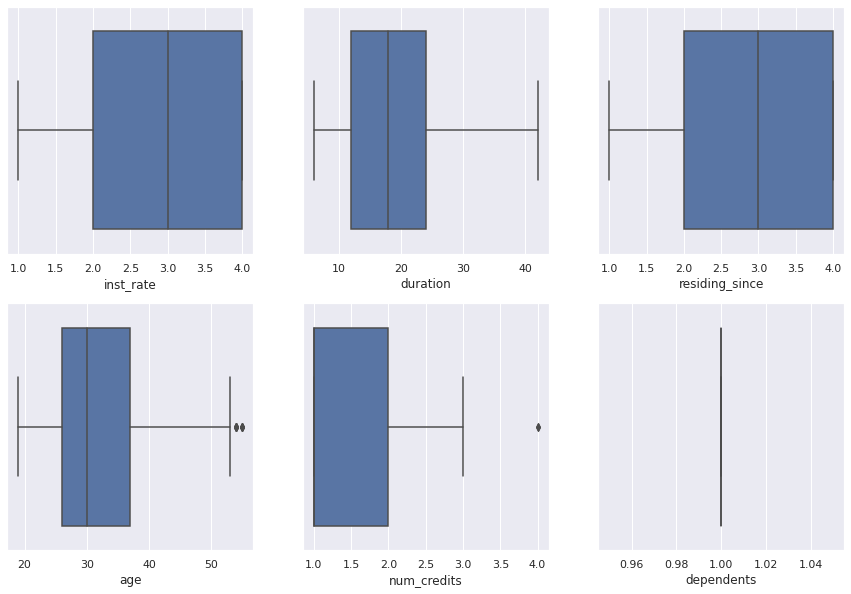

In [50]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [11]:
corr_analysis = credit_df.corr()

In [39]:
sb.set(rc={"figure.figsize":(50,17)})

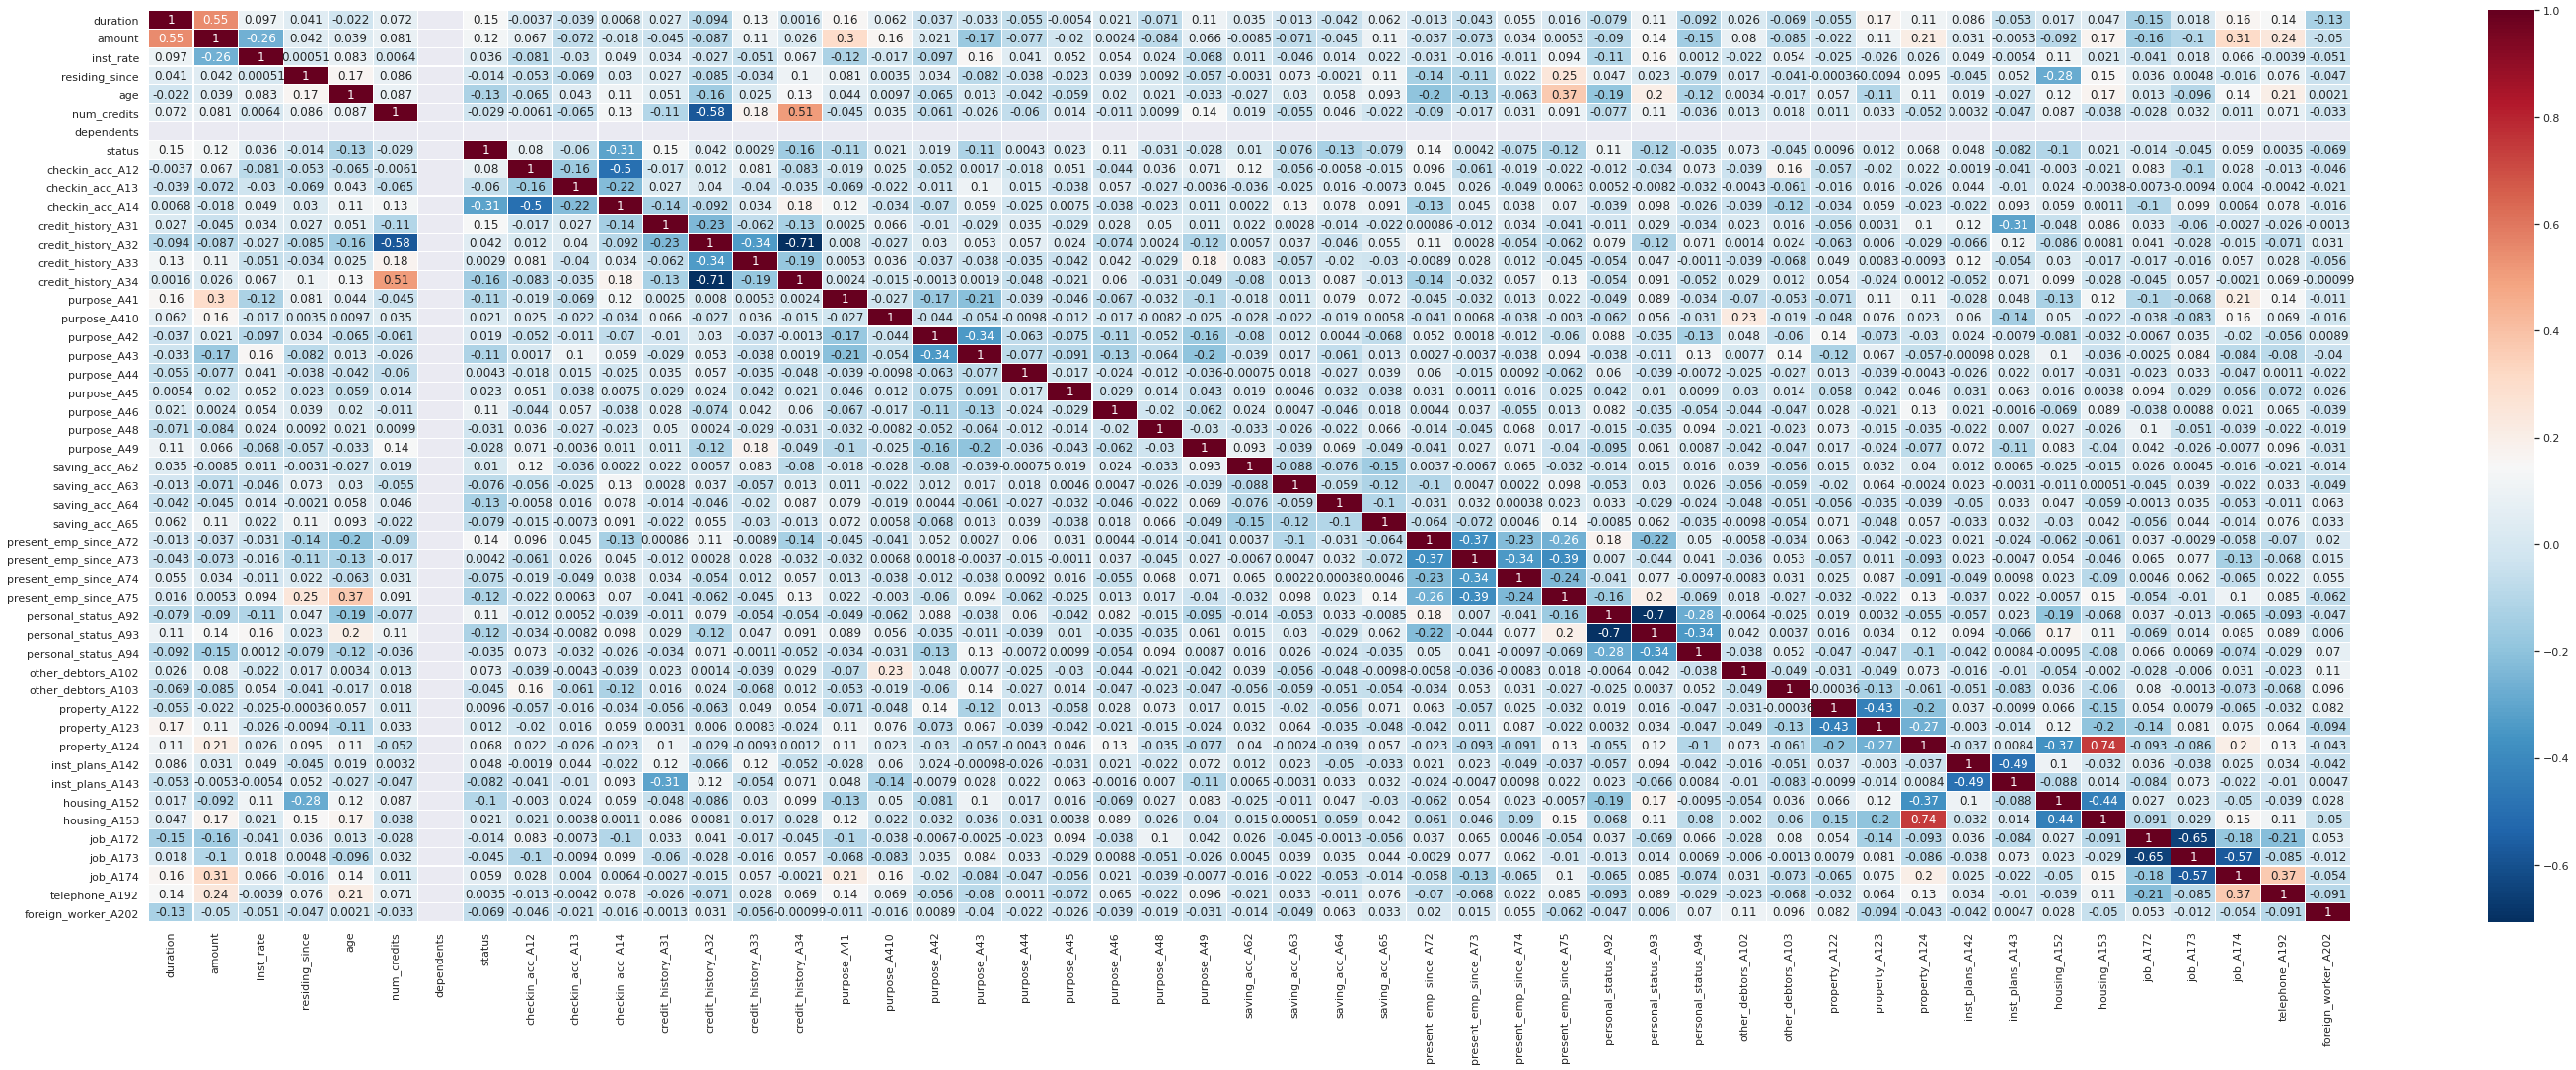

In [40]:
sb.heatmap(corr_analysis,
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

In [14]:
max_duration = np.amax(credit_df["duration"])
max_amount = np.amax(credit_df["amount"])
max_inst_rate = np.amax(credit_df["inst_rate"])
max_residing_since = np.amax(credit_df["residing_since"])
max_dependents = np.amax(credit_df["dependents"])
max_age = np.amax(credit_df["age"])
max_num_credits = np.amax(credit_df["num_credits"])

In [15]:
# Dividing each feature with it's maximum value
credit_df["duration"] = credit_df["duration"]/max_duration
credit_df["amount"] = credit_df["amount"]/max_amount
credit_df["inst_rate"] = credit_df["inst_rate"]/max_inst_rate
credit_df["residing_since"] = credit_df["residing_since"]/max_residing_since
credit_df["dependents"] = credit_df["dependents"]/max_dependents
credit_df["age"] = credit_df["age"]/max_age
credit_df["num_credits"] = credit_df["num_credits"]/max_num_credits

In [16]:
Y = credit_df.status - 1
X = credit_df.drop("status", axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.027, random_state = 2 )
print("Training Data Size: ", X_train.shape[0])
print("Testing Data Size: ", X_test.shape[0])

Training Data Size:  706
Testing Data Size:  20


In [18]:
X_train = np.array(X_train)
y_train = np.array(keras.utils.to_categorical(y_train, 2))
X_test = np.array(X_test)
y_test = np.array(keras.utils.to_categorical(y_test, 2))

print(X_train[:10])
print(y_train[:10])

[[0.28571429 0.02579303 0.75       0.75       0.76363636 0.5
  1.         0.         1.         0.         1.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         1.         0.         0.         0.        ]
 [0.23809524 0.12133443 0.25       1.         0.69090909 0.25
  1.         0.         0.         1.         0.         1.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         1.         0.         0.         0.
  1.         0.         0.         0.         1.         1.
  0.         0.         1.         0.         1.         1.        ]
 [0.28571429 0.0747

In [23]:
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               12544     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [24]:
hist = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_split=0.25,
                 shuffle=True)

Epoch 1/25
6/6 [==============================] - 0s 72ms/step - loss: 0.7283 - accuracy: 0.5312 - val_loss: 0.6654 - val_accuracy: 0.6497
Epoch 2/25
6/6 [==============================] - 0s 24ms/step - loss: 0.6155 - accuracy: 0.7221 - val_loss: 0.7175 - val_accuracy: 0.6497
Epoch 3/25
6/6 [==============================] - 0s 21ms/step - loss: 0.6062 - accuracy: 0.7316 - val_loss: 0.7052 - val_accuracy: 0.6497
Epoch 4/25
6/6 [==============================] - 0s 20ms/step - loss: 0.5897 - accuracy: 0.7278 - val_loss: 0.6708 - val_accuracy: 0.6497
Epoch 5/25
6/6 [==============================] - 0s 20ms/step - loss: 0.5951 - accuracy: 0.7070 - val_loss: 0.6522 - val_accuracy: 0.6497
Epoch 6/25
6/6 [==============================] - 0s 23ms/step - loss: 0.5693 - accuracy: 0.7259 - val_loss: 0.6425 - val_accuracy: 0.6497
Epoch 7/25
6/6 [==============================] - 0s 18ms/step - loss: 0.5790 - accuracy: 0.7202 - val_loss: 0.6402 - val_accuracy: 0.6497
Epoch 8/25
6/6 [===========

In [25]:
training_score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", training_score[1])
testing_score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", testing_score[1])

23/23 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.7394

 Training Accuracy: 0.7393767833709717
1/1 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7500

 Testing Accuracy: 0.75


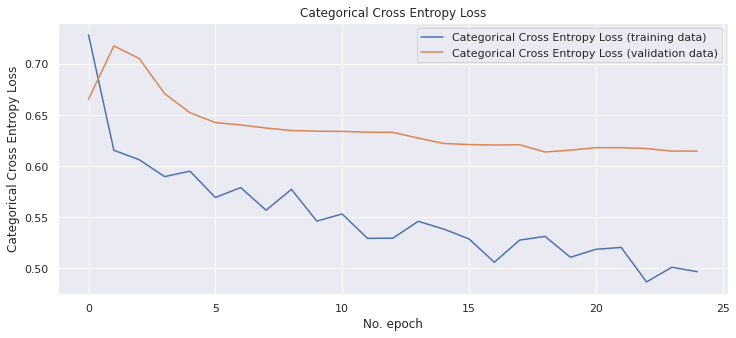

In [33]:
plt.figure(figsize=(12, 5))

plt.plot(hist.history['loss'], label='Categorical Cross Entropy Loss (training data)')
plt.plot(hist.history['val_loss'], label='Categorical Cross Entropy Loss (validation data)')
plt.title('Categorical Cross Entropy Loss')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [26]:
# plotting accuracy graph
results = model.predict_classes(X_test, verbose=1)

1/1 [==============================] - 0s 1ms/step


In [27]:
print("Predicted Results: ")
results

Predicted Results: 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [28]:
y_real = np.argmax(y_test, axis=-1)
print("Actual Results: ")
y_real

Actual Results: 


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [34]:
total = 0
# good = 0, bad = 1
for real, pred in zip(y_real, results):
    if real == 0 and pred == 1:
        total = total + 1
    elif real == 1 and pred == 0:
        total = total + 5
        
print("Final Score: ", total)

Final Score:  17


# we need to plot some Confusion Matrix

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[15  2]
 [ 3  0]]
Normalized confusion matrix
[[0.88 0.12]
 [1.   0.  ]]


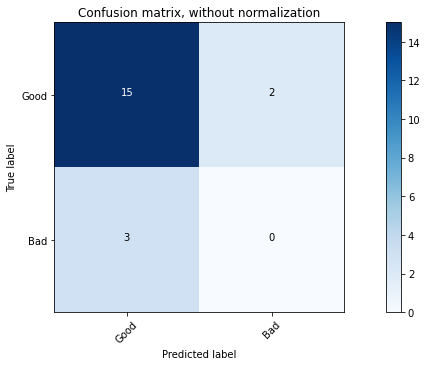

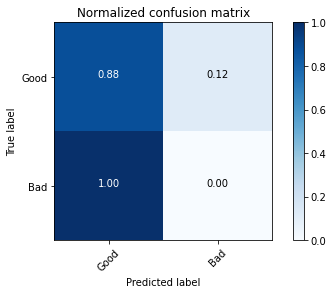

In [4]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix

class_names=["Good", "Bad"]
cnf_matrix = confusion_matrix(y_real, results)
np.set_printoptions(precision=2)

plt.figure(figsize=(12, 5))
# Plot non-normalized confusion matrix
# plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()